In [1]:
import numpy as np
from keras.applications import vgg16
from keras.preprocessing import image
from keras.activations import relu, softmax
import keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
!wget "http://www.vision.caltech.edu/Image_Datasets/Caltech101/SamplePics/image_0031.jpg"

--2019-02-07 15:47:34--  http://www.vision.caltech.edu/Image_Datasets/Caltech101/SamplePics/image_0031.jpg
正在解析主机 www.vision.caltech.edu (www.vision.caltech.edu)... 34.208.54.77
正在连接 www.vision.caltech.edu (www.vision.caltech.edu)|34.208.54.77|:80... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：17413 (17K) [image/jpeg]
正在保存至: “image_0031.jpg.2”

image_0031.jpg.2    100%[===================>]  17.00K  33.7KB/s  用时 0.5s      

2019-02-07 15:47:36 (33.7 KB/s) - 已保存 “image_0031.jpg.2” [17413/17413])



In [3]:
model = vgg16.VGG16(weights='imagenet')

In [4]:
!ls

'adversarial example.ipynb'		  image_0031.jpg
'Fast gradient sign method-keras.ipynb'   image_0031.jpg.1


(1, 1000)
Predicted: [('n01871265', 'tusker', 0.5230714), ('n02504458', 'African_elephant', 0.43376717), ('n02504013', 'Indian_elephant', 0.043161046)]


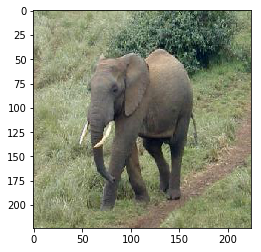

In [4]:
img_path = 'image_0031.jpg'
img = image.load_img(img_path, target_size=(224,224))

plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg16.preprocess_input(x)

preds = model.predict(x)
print(preds.shape)
print('Predicted:', vgg16.decode_predictions(preds, top=3)[0])

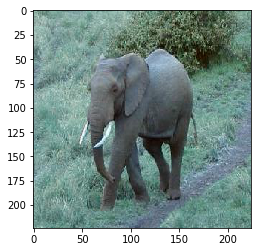

In [5]:
t = np.clip((x[0]+[103.939, 116.779, 123.68]), 0, 255)/255
plt.imshow(t)

In [6]:
sess = K.get_session()
grads = K.gradients(model.output[0][950], model.input)
x_adv = x - K.sign(grads[0])
x_adv = sess.run(x_adv, feed_dict={model.input:x})

In [7]:
np.max(sess.run(grads, feed_dict={model.input:x})[0][0])

3.0749784e-17

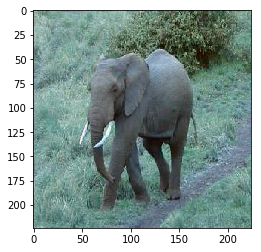

In [8]:
plt.imshow(np.clip((x_adv[0]+[103.939, 116.779, 123.68]), 0, 255)/255)

In [9]:
preds = model.predict(x_adv)
np.argmax(preds)

101

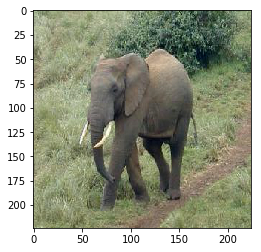

In [11]:
def plot_img(x):
  t = np.zeros_like(x[0])
  t[:,:,0] = x[0][:,:,2]
  t[:,:,1] = x[0][:,:,1]
  t[:,:,2] = x[0][:,:,0]  
  plt.imshow(np.clip((t+[123.68, 116.779, 103.939]), 0, 255)/255)
  plt.grid(False)
  
plot_img(x_adv)

0 [('n01871265', 'tusker', 0.5230714), ('n02504458', 'African_elephant', 0.43376717), ('n02504013', 'Indian_elephant', 0.043161046)]
1 [('n01871265', 'tusker', 0.5230714), ('n02504458', 'African_elephant', 0.43376717), ('n02504013', 'Indian_elephant', 0.043161046)]
2 [('n01871265', 'tusker', 0.5230714), ('n02504458', 'African_elephant', 0.43376717), ('n02504013', 'Indian_elephant', 0.043161046)]
3 [('n01871265', 'tusker', 0.5230714), ('n02504458', 'African_elephant', 0.43376717), ('n02504013', 'Indian_elephant', 0.043161046)]
4 [('n01871265', 'tusker', 0.5230714), ('n02504458', 'African_elephant', 0.43376717), ('n02504013', 'Indian_elephant', 0.043161046)]
5 [('n01871265', 'tusker', 0.5230714), ('n02504458', 'African_elephant', 0.43376717), ('n02504013', 'Indian_elephant', 0.043161046)]
6 [('n01871265', 'tusker', 0.5230714), ('n02504458', 'African_elephant', 0.43376717), ('n02504013', 'Indian_elephant', 0.043161046)]
7 [('n01871265', 'tusker', 0.5230714), ('n02504458', 'African_elephan

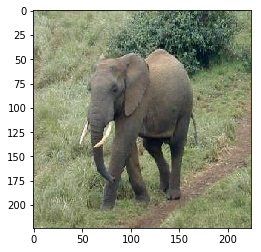

In [12]:
sess = K.get_session()

x_adv = x

for i in range(40): 
  grads = K.gradients(model.output, model.input)
  x_adv = x_adv - 0.2*K.sign(grads[0])
  x_adv = sess.run(x_adv, feed_dict={model.input:x})
  preds = model.predict(x_adv)
  print(i, vgg16.decode_predictions(preds, top=3)[0])
  
plot_img(x_adv-x)
plot_img(x_adv)

In [16]:
preds = model.predict(x_adv)
print(i, vgg16.decode_predictions(preds, top=3)[0])

39 [('n01871265', 'tusker', 0.5230714), ('n02504458', 'African_elephant', 0.43376717), ('n02504013', 'Indian_elephant', 0.043161046)]


In [13]:
preds = model.predict(x_adv)
print(i, vgg16.decode_predictions(preds, top=3)[0])

39 [('n01871265', 'tusker', 0.5230714), ('n02504458', 'African_elephant', 0.43376717), ('n02504013', 'Indian_elephant', 0.043161046)]


In [14]:
!wget "https://c.stocksy.com/a/uXv300/z9/936194.jpg"
!mv "936194.jpg" "flamingo.jpg"
!ls

--2019-02-07 16:05:14--  https://c.stocksy.com/a/uXv300/z9/936194.jpg
正在解析主机 c.stocksy.com (c.stocksy.com)... 104.18.212.42, 104.18.213.42, 2606:4700::6812:d52a, ...
正在连接 c.stocksy.com (c.stocksy.com)|104.18.212.42|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：139339 (136K) [image/jpeg]
正在保存至: “936194.jpg”

936194.jpg          100%[===================>] 136.07K   304KB/s  用时 0.4s      

2019-02-07 16:05:16 (304 KB/s) - 已保存 “936194.jpg” [139339/139339])

'adversarial example.ipynb'		  flamingo.jpg	   image_0031.jpg.1
'Fast gradient sign method-keras.ipynb'   image_0031.jpg   image_0031.jpg.2


In [15]:
model = vgg16.VGG16(weights='imagenet')

/home/viewv/anaconda3/envs/DeepLearning/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Predicted: [('n02007558', 'flamingo', 0.966613), ('n03888257', 'parachute', 0.017566277), ('n01910747', 'jellyfish', 0.0074542486)]


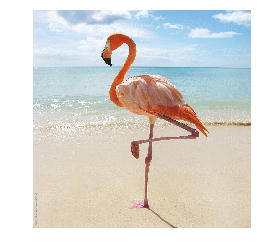

In [17]:
img_path = 'flamingo.jpg'
img = image.load_img(img_path, target_size=(224,224))

plt.imshow(img)
plt.grid('off')
plt.axis('off')

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg16.preprocess_input(x)

preds = model.predict(x)
initial_class = np.argmax(preds)
print('Predicted:', vgg16.decode_predictions(preds, top=3)[0])

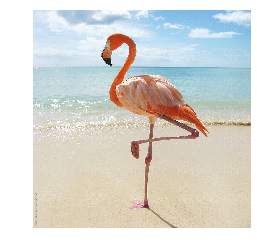

In [18]:

def plot_img(x):
  """
  x is a BGR image with shape (? ,224, 224, 3) 
  """
  t = np.zeros_like(x[0])
  t[:,:,0] = x[0][:,:,2]
  t[:,:,1] = x[0][:,:,1]
  t[:,:,2] = x[0][:,:,0]  
  plt.imshow(np.clip((t+[123.68, 116.779, 103.939]), 0, 255)/255)
  plt.grid('off')
  plt.axis('off')
  plt.show()
  
plot_img(x)

0 0.86751527 [('n02007558', 'flamingo', 0.86751527), ('n03888257', 'parachute', 0.07682926), ('n01910747', 'jellyfish', 0.033385605)]
1 0.61843336 [('n02007558', 'flamingo', 0.61843336), ('n03888257', 'parachute', 0.2265876), ('n01910747', 'jellyfish', 0.10359887)]
2 0.3138529 [('n03888257', 'parachute', 0.4047561), ('n02007558', 'flamingo', 0.3138529), ('n01910747', 'jellyfish', 0.19332986)]
3 0.1278757 [('n03888257', 'parachute', 0.50091916), ('n01910747', 'jellyfish', 0.25164533), ('n02007558', 'flamingo', 0.1278757)]
4 0.048748534 [('n03888257', 'parachute', 0.53123015), ('n01910747', 'jellyfish', 0.27119517), ('n09428293', 'seashore', 0.052293207)]
5 0.020222748 [('n03888257', 'parachute', 0.5339473), ('n01910747', 'jellyfish', 0.26682207), ('n09428293', 'seashore', 0.06759972)]
6 0.008740376 [('n03888257', 'parachute', 0.5319736), ('n01910747', 'jellyfish', 0.25108317), ('n09428293', 'seashore', 0.08266305)]
7 0.0040203203 [('n03888257', 'parachute', 0.52485394), ('n01910747', 'j

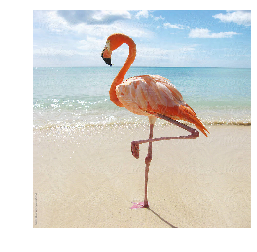

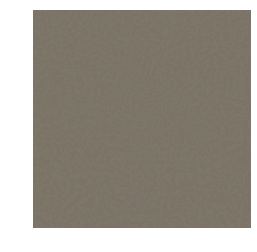

In [22]:
# Get current session(assuming tf backend)
sess = K.get_session()
# Initialize adversarial example with input image
x_adv = x

# Set variables
epochs = 15
epsilon = 0.1

for i in range(epochs): 
  # Gradient of the .......
  targt = np.zeros((1,1000))
  targt[0,initial_class] = 1
  grads = K.gradients(K.categorical_crossentropy(targt, model.output), model.input)
  x_adv = x_adv + epsilon*K.sign(grads[0])
  x_adv = sess.run(x_adv, feed_dict={model.input:x})
  preds = model.predict(x_adv)
#   if i%10==0:
  print(i, preds[0][initial_class], vgg16.decode_predictions(preds, top=3)[0])

plot_img(x_adv)   
plot_img(x_adv-x)

/home/viewv/anaconda3/envs/DeepLearning/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


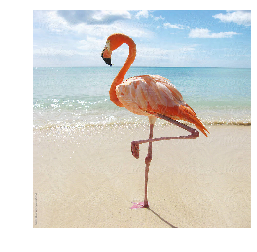

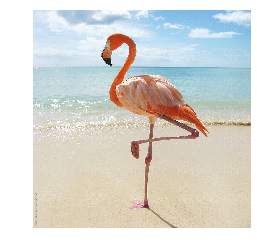

In [24]:
plot_img(x_adv)
plot_img(x)

In [27]:
!export http_proxy="http://127.0.0.1:12333"
!export https_proxy="http://127.0.0.1:12333
!wget "https://raw.githubusercontent.com/soumyac1999/FGSM-Keras/master/orange.jpg"
!ls

/bin/sh: 1: Syntax error: Unterminated quoted string
--2019-02-07 16:17:17--  https://raw.githubusercontent.com/soumyac1999/FGSM-Keras/master/orange.jpg
正在解析主机 raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.24.133
正在连接 raw.githubusercontent.com (raw.githubusercontent.com)|151.101.24.133|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：204426 (200K) [image/jpeg]
正在保存至: “orange.jpg”

orange.jpg          100%[===================>] 199.63K  37.6KB/s  用时 5.3s      

2019-02-07 16:17:24 (37.6 KB/s) - 已保存 “orange.jpg” [204426/204426])

'adversarial example.ipynb'		  image_0031.jpg     orange.jpg
'Fast gradient sign method-keras.ipynb'   image_0031.jpg.1
 flamingo.jpg				  image_0031.jpg.2


Predicted: [('n07747607', 'orange', 0.9942152), ('n07749582', 'lemon', 0.0041732085), ('n03991062', 'pot', 0.00032574194)]


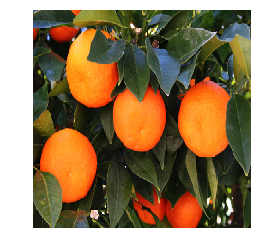

In [28]:
img_path = 'orange.jpg'
img = image.load_img(img_path, target_size=(224,224))

plt.imshow(img)
plt.grid('off')
plt.axis('off')

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg16.preprocess_input(x)

preds = model.predict(x)
initial_class = np.argmax(preds)
print('Predicted:', vgg16.decode_predictions(preds, top=3)[0])

In [29]:
# Get current session(assuming tf backend)
sess = K.get_session()
# Initialize adversarial example with input image
x_adv = x
# Added noise
x_noise = np.zeros_like(x)

# Set variables
epochs = 400
epsilon = 0.01
target_class = 943 # cucumber
prev_probs = []

for i in range(epochs): 
  
  target = K.one_hot(target_class, 1000)
  
  loss = -1*K.categorical_crossentropy(target, model.output)
  grads = K.gradients(loss, model.input)
  
  delta = K.sign(grads[0])
  x_noise = x_noise + delta
  
  x_adv = x_adv + epsilon*delta
  
  x_adv = sess.run(x_adv, feed_dict={model.input:x})
  preds = model.predict(x_adv)
  
  prev_probs.append(preds[0][target_class])
  
  if i%20==0:
    print(i, preds[0][target_class], vgg16.decode_predictions(preds, top=3)[0])

plot_img(x_adv)
plot_img(x_adv-x)

0 4.3977507e-05 [('n07747607', 'orange', 0.9937942), ('n07749582', 'lemon', 0.0044014854), ('n03991062', 'pot', 0.0003590454)]
20 0.0008213526 [('n07747607', 'orange', 0.9742811), ('n07749582', 'lemon', 0.011465285), ('n03991062', 'pot', 0.002050682)]
40 0.008291192 [('n07747607', 'orange', 0.9012829), ('n07749582', 'lemon', 0.024245108), ('n07718472', 'cucumber', 0.008291192)]
60 0.041147422 [('n07747607', 'orange', 0.71997404), ('n07718472', 'cucumber', 0.041147422), ('n07749582', 'lemon', 0.035623204)]
80 0.1031664 [('n07747607', 'orange', 0.46679023), ('n07718472', 'cucumber', 0.1031664), ('n07749582', 'lemon', 0.03712333)]
100 0.16539568 [('n07747607', 'orange', 0.2724782), ('n07718472', 'cucumber', 0.16539568), ('n07717410', 'acorn_squash', 0.04900888)]
120 0.21704559 [('n07718472', 'cucumber', 0.21704559), ('n07747607', 'orange', 0.16115774), ('n07717410', 'acorn_squash', 0.060484834)]
140 0.25507033 [('n07718472', 'cucumber', 0.25507033), ('n07747607', 'orange', 0.10304967), ('

KeyboardInterrupt: 